# Week 3: Working with NC files, regression
You can download this notebook and interact with it in Anaconda Jupyter Notebook.
This week we go over multidimensional gridded data, which are commonly stored as netcdf (NC) files. For example, our global precipitation file is 3-D with dimensions for time, latitude, and longitude. We'll also start discussing regression, a statistical method for fitting a trendline and evaluation correlation between data

In [18]:
import numpy as np
import matplotlib.pyplot as py
import xarray

### Global precipitation example

In [19]:
filename = 'precipdata.nc'
nc_file = xarray.open_dataset(filename)
print(nc_file)

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 452)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2016-08-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes:
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    description:           http://eagle1.umd.edu/GPCP_ICDR/GPCPmonthlyV2.3.pdf
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:       

In [20]:
#extract variables and put them into numpy arrays
precip = nc_file['precip'].data
time = nc_file['time'].data
lat = nc_file['lat'].data
lon = nc_file['lon'].data
lat_bnds = nc_file['lat_bnds'].data
print(precip.shape, lat.shape, lat_bnds.shape)
print(precip.dtype)

(452, 72, 144) (72,) (72, 2)
float32


In [21]:
meanppt = np.mean(precip, axis = 0) #mean along the 'time' axis
print(meanppt.shape)

(72, 144)


#### Plot time-averaged precip map

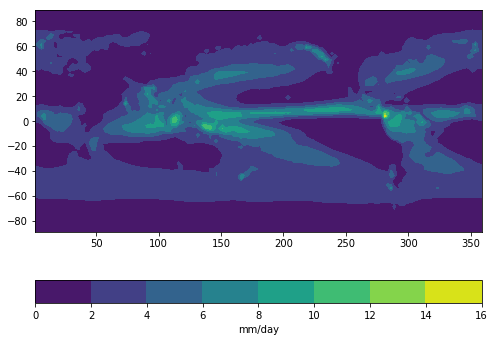

In [22]:
py.close()
fig = py.figure(figsize=(8,6))
ax = fig.add_subplot(111)
countour_plot = ax.contourf(lon, lat, meanppt) #could change colormap here too
ax.axes.set_aspect('equal')
cbar = py.colorbar(countour_plot, orientation='horizontal')
cbar.set_label('mm/day')
py.show()

#### Find location with the most precipitation

In [23]:
maxppt = np.max(meanppt)
print('Max ppt = ', maxppt, 'mm/day')

Max ppt =  14.517002 mm/day


In [24]:
#convert to meters per year
maxppt_yrs = maxppt/1000*365
print('Max ppt = ', maxppt_yrs, 'm/yr')

Max ppt =  5.298705768585205 m/yr


In [25]:
#find where that maximum precip occurs
indices = np.where(meanppt == maxppt) #the == is called a conditional statement
print(indices)

(array([37]), array([112]))


In [26]:
i = indices[0]
j = indices[1]

In [27]:
print(lat[i], lon[j])

[3.75] [281.25]


#### Nested for loops: looping over both latitude and longitude
The following example is the slow way of finding the location of maximum precip. We introduce 2 new concepts: nested for loops and conditional statements. We loop over every combination of [lat, lon] in the array and check if that precipation value is larger than our current largest value

In [35]:
maxslow = 0.0
for i in range(len(lat)):
    for j in range(len(lon)):
        if meanppt[i,j] > maxslow: #conditional statement comparing 2 values
            maxslow = meanppt[i,j] #overwrite the max value if we find a larger value
            imax = i
            jmax = j
print(maxslow)
print('lat', lat[imax], 'lon', lon[jmax])

14.517002
lat 3.75 lon 281.25
